<a href="https://colab.research.google.com/github/CodeTunisia/InformatiqueMathsSpe-2122/blob/main/ds1/%C3%89preuve%20d%E2%80%99informatique%20No1%20-%20corrig%C3%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Préparation : Convertir une image RGB en une image en teintes de gris

In [2]:
!wget https://raw.githubusercontent.com/CodeTunisia/InformatiqueMathsSpe-2122/main/ds1/einstein.png

--2021-10-31 23:48:22--  https://raw.githubusercontent.com/CodeTunisia/InformatiqueMathsSpe-2122/main/ds1/einstein.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 186834 (182K) [image/png]
Saving to: ‘einstein.png’

einstein.png        100%[===================>] 182.46K  --.-KB/s    in 0.02s   

2021-10-31 23:48:22 (9.06 MB/s) - ‘einstein.png’ saved [186834/186834]



uint8


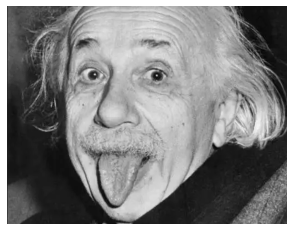

array([[ 34.,  87.,  87., ...,  25.,  25.,  25.],
       [ 34.,  87.,  87., ...,  25.,  25.,  25.],
       [ 35.,  86.,  87., ...,  25.,  25.,  25.],
       ...,
       [ 35., 100.,  92., ...,  65.,  69.,  71.],
       [ 33., 100.,  92., ...,  69.,  73.,  41.],
       [ 35.,  97.,  90., ...,  70.,  75.,  50.]])

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import math as m
import imageio
M=imageio.imread('einstein.png')
print(M.dtype)
def niveau_gris(M):
    n,p,c=M.shape
    G=np.ndarray((n,p))
    for i in range(n):
        for j in range(p):
            x=m.floor(M[i,j][0]*0.299 + M[i,j][1]*0.587 + M[i,j][2]*0.114)
            G[i,j]=x

    plt.imshow(G, cmap = "gray")
    plt.axis("off")
    imageio.imwrite('imageA.png', G)
    plt.show()
    return G
niveau_gris(M)

<center>
  <h1>Image en gris.</h1>
</center>

# Première partie : Opérations élémentaires - POO

**Q1.** Pour une image de profondeur $P = 15$ chaque pixel est encodé sur 4 bits (un pixel peut avoir valeur entre 0 et $2^4 -1 =15$). D'où l'espace disque total pour stocker 50 images carrées de tailles (500 × 500) pixels est égal à : $(50 \times 4 \times 500 \times 500)/8 = 6250000$ octets $= 6.25$ Mo

**Q2.** Classe `Image_niv_gris`

In [4]:
import matplotlib.pyplot as plt
import numpy as np
class Image_niv_gris:
    def __init__(self, M, P):
        # Q2.
        self.M = M # ou self.matrice et l'utilisez dans la suite du problème.
        self.H = M.shape[0]
        self.L = M.shape[1]
        self.P = P
    def visualiser(self) :
        plt.imshow(self.M, cmap = "gray") # ou self.matrice
        plt.axis("off")
        plt.show()
    def __str__(self) :
        # Q2.
        return "image en niveau de gris de dimensions ({} x {})".format(self.H, self.L)
    # Q3.
    def inverser(self):
        B = np.copy(self.M)
        for l in range(self.H):
            for c in range(self.L):
                B[l,c] = self.P - self.M[l,c]
        return Image_niv_gris(B, self.P)
    #Q4. 
    def flipH(self):
        C = np.copy(self.M)
        for c in range(self.L):
            C[:,c]=self.M[:,self.L-c-1]
        return Image_niv_gris(C, self.P)
    #Q5.
    def poserV(self, Im2):
        T=np.append(self.M,Im2.M,axis=0)
        return Image_niv_gris(T, self.P)
    #Q6.
    def poserH(self, Im2):
        T=np.append(self.M,Im2.M,axis=1)
        return Image_niv_gris(T, self.P)
    

## Utilisation de la classe 

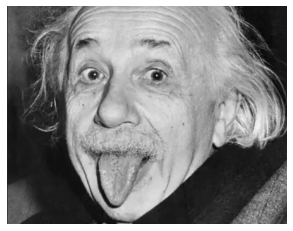

In [5]:
# Q1.
M = plt.imread("imageA.png")
# uint4 n'existe pas, une conversion possible par la fonction de transfert (Partie 2)
M = (M*255).astype(np.uint8) # pas de problème si on utilise uint8
Im = Image_niv_gris(M, 255)
Im.visualiser()

In [6]:
print(Im)

image en niveau de gris de dimensions (397 x 510)


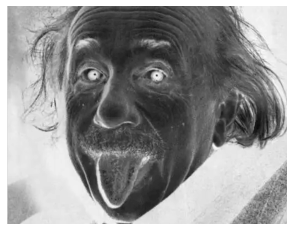

In [7]:
# Q3.
Im_B = Im.inverser()
Im_B.visualiser()

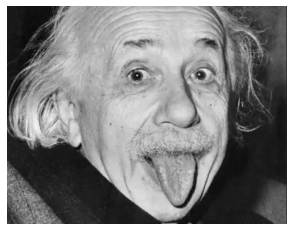

In [8]:
# Q4.
Im_C = Im.flipH()
Im_C.visualiser()

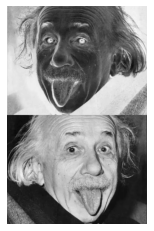

In [9]:
# Q5.
Im_D = Im_B.poserV(Im_C)
Im_D.visualiser()

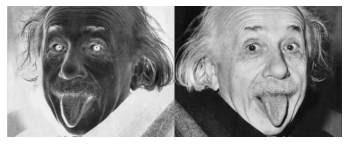

In [10]:
# Q6.
Im_E = Im_B.poserH(Im_C)
Im_E.visualiser()

# Deuxième partie : Transferts

In [11]:
# Q7.
def transferer(Im, P2, t):
    Im_T = Image_niv_gris(Im.M.copy(), P2)
    for l in range(Im.H):
        for c in range(Im.L):
            Im_T.M[l, c] = t[Im.M[l, c]]
    return Im_T

In [12]:
# Q8.
def inverser(Im):
    t = list(range(Im.P, -1, -1))
    return transferer(Im, Im.P, t)

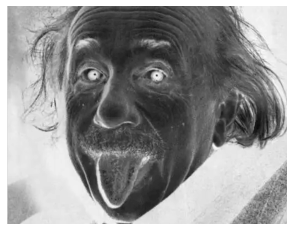

In [13]:
Im_inv2 = inverser(Im)
Im_inv2.visualiser()

In [14]:
# Q9.
def histogramme(Im, h):
    for l in range (Im.H):
        for c in range (Im.L):
            h[Im.M[l, c]] += 1

In [15]:
h = [0]*(Im.P+1)
histogramme(Im, h)
print(h)

[9, 8, 0, 13, 0, 13, 17, 83, 0, 47, 80, 0, 551, 0, 0, 676, 2961, 0, 2080, 0, 1742, 1551, 4064, 0, 3589, 4872, 5745, 5184, 0, 3689, 2828, 2559, 2319, 0, 1868, 1535, 1393, 1217, 1232, 1137, 0, 1093, 995, 0, 996, 1692, 0, 660, 0, 677, 542, 573, 1060, 502, 0, 465, 0, 456, 962, 0, 1020, 0, 577, 0, 561, 1094, 0, 505, 554, 0, 530, 0, 612, 537, 560, 567, 595, 0, 660, 617, 1321, 0, 662, 630, 669, 0, 679, 670, 701, 771, 1485, 0, 0, 1499, 0, 664, 676, 1216, 0, 0, 0, 526, 529, 491, 890, 438, 0, 432, 0, 431, 477, 972, 0, 437, 0, 476, 499, 1062, 471, 0, 502, 452, 0, 507, 523, 1099, 0, 492, 0, 0, 574, 1186, 585, 0, 611, 680, 0, 658, 618, 660, 710, 720, 753, 0, 793, 816, 847, 1846, 0, 1036, 0, 1101, 1070, 2543, 0, 1381, 0, 1402, 0, 1538, 1601, 3174, 1759, 0, 1756, 0, 1741, 3310, 0, 1673, 1611, 1799, 1729, 0, 3602, 0, 1814, 1871, 1797, 1774, 1845, 1860, 0, 1831, 0, 1928, 1882, 1829, 1951, 1925, 0, 1825, 1803, 1765, 1827, 0, 3621, 0, 1696, 1810, 1734, 1839, 0, 1804, 1787, 1770, 1793, 1700, 1617, 1463, 1

Text(0, 0.5, 'Nombre de pixels')

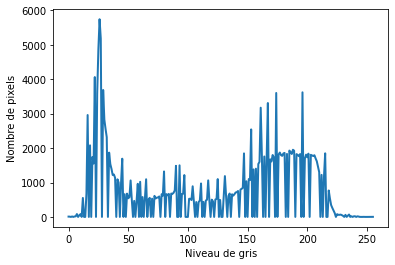

In [16]:
plt.plot(h, lw = 2)
plt.xlabel("Niveau de gris")
plt.ylabel("Nombre de pixels")

**Q10.** On introduit une fonction auxiliaire `vmin(h)` calculant $v_{min}$ . C’est le premier indice d’une valeur non-nulle dans l’histogramme.

In [17]:
def vmin(h):
    for v in range(len(h)):
        if h[v]!=0:
            return v

On calcule ensuite, pour tous les v, la somme $\sum_{k=0}^{k=v} h[k]$

In [18]:
def histogramme_cumule(h):
    for k in range (1,len (h)):
        h[k] += h[k-1]

Soit la fonction  `vprim` qui renvoie le tableau `h` en fonction de $v$.

In [19]:
def vprim(Im):
    h = [0] * (Im.P+1)
    histogramme(Im,h)
    hvmin=h[vmin(h)]
    histogramme_cumule(h)
    a = Im.P/(Im.H * Im.L - hvmin)
    for k in range(len(h)):
        h[k] = a * (h[k]-hvmin)
    return h

Enfin, la fonction `egaliser` s’écrit alors :

In [20]:
def egaliser(Im):
    t = vprim(Im)
    return transferer(Im, Im.P, t)

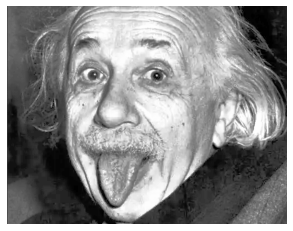

In [21]:
Im_egalise = egaliser(Im)
Im_egalise.visualiser()

**Q11.** La fonction `egaliser` appliquée à une image uniformément blanche renvoie un message d'erreur "Division par zéro" au nivau de `a = Im.P/(Im.H * Im.L - hvmin)` car l'histogramme de l'image uniformément blanche compte que des valeurs de pixels blancs (255), ainsi il y a q'une seule vleur non nulle dans `h` qui est $h[v_{min}] = H \times L$.

In [22]:
# Q12.
def reduire(Im, P2):
    t = [round(v/Im.P*P2) for v in range(Im.P+1)]
    return transferer(Im, P2, t)

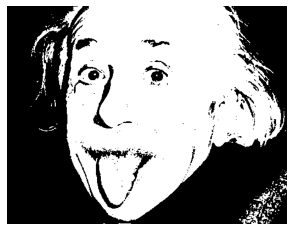

In [23]:
Im_G = reduire(Im, 1)
Im_G.visualiser()

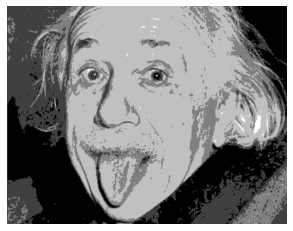

In [24]:
Im_H = reduire(Im, 4)
Im_H.visualiser()

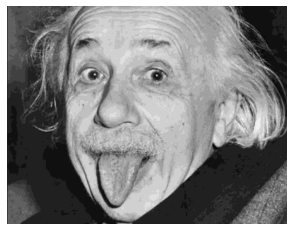

In [25]:
Im_I = reduire(Im, 16)
Im_I.visualiser()

In [26]:
# Q13.
def tramer(Im, Im1):
    Im_taramee = reduire(Im, 1)
    for l in range (Im.H):
        for c in range (Im.L):
            w = Im1.M[l%Im1.H, c%Im1.L]
            Im_taramee.M[l, c] = int(Im.M[l,c]>w)
    return Im_taramee

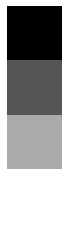

In [27]:
M = np.array([[0, 1, 2, 3]]).T
Im_J = Image_niv_gris(M, 3)
Im_J.visualiser()

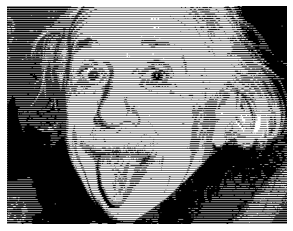

In [28]:
Im_tarmer = tramer(Im_H, Im_J)
Im_tarmer.visualiser()

In [29]:
# Q14.
def Trame_Tv(P):
    M_Tv = np.array([list(range(P))]).T
    trame = Image_niv_gris(M_Tv, P-1)
    for k in range(P):
        trame.M[k,0] = k
    return trame

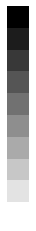

In [30]:
Tv_tr = Trame_Tv(10)
Tv_tr.visualiser()

In [31]:
def tramerTelevision(Im):
    return tramer(Im, Trame_Tv(Im.P))

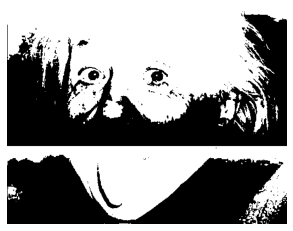

In [32]:
Im_Tv = tramerTelevision(Im)
Im_Tv.visualiser()

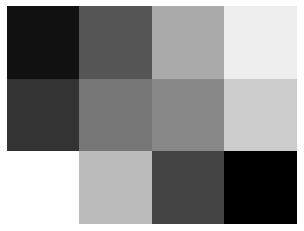

In [33]:
# Q15
M2Q = np.array([[1, 5, 10, 14],[3, 7, 8, 12],[15, 11, 4, 0]])
deuxQuarts = Image_niv_gris(M2Q, 15)
deuxQuarts.visualiser()

On introduit une fonction auxiliaire `creerTrame` qui crée le motif de droite à partir de l’image de gauche `deuxQuarts`.

In [34]:
def creerTrame(q):
    Im_0 = q.flipH()
    Im_1 = q.poserH(Im_0)
    Im_2 = Im_0.poserH(q)
    return Im_1.poserV(Im_2)

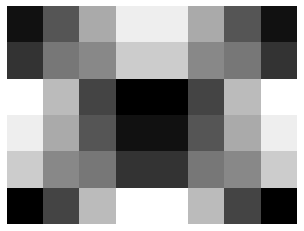

In [35]:
trameQ=creerTrame(deuxQuarts)
trameQ.visualiser()

In [36]:
def tramerJournal(Im):
    return tramer(Im, creerTrame(deuxQuarts))

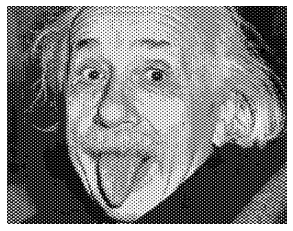

In [37]:
Im_M = tramerJournal(Im_I)
Im_M.visualiser()